In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8], len(words)

(['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia'],
 32033)

In [3]:
chars = sorted(set([c for w in words for c in w]))
stoi = {s:i+1 for i, s in enumerate(chars)}
itos = {i+1:s for i, s in enumerate(chars)}

stoi['.'] = 0
itos[0] = '.'

In [4]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [5]:
def build_dataset(words):
    blocksz = 3
    X = []
    Y = []
    
    for w in words:
        chs = list(w) + ['.']
        x = [0]*blocksz
        i = 0
        while True:
            y = stoi[chs[i]]
            X.append(x)
            Y.append(y)
            x = x[1:] + [y]
            if itos[y] == '.':break
            i += 1
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1 : n2])
Xte, Yte = build_dataset(words[n2 :])

In [6]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [7]:
sum(p.nelement() for p in parameters)

17697

In [8]:
for p in parameters:
    p.requires_grad = True

In [9]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [10]:
# lri = []
stepi = []
losses = []


In [15]:

for i in range(200000):
    ix = torch.randint(0, Xtr.shape[0], (32, ), generator=g)
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdim=True)
    # loss = -probs[torch.arange(probs.shape[0]), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(i, "  ", loss.item())
    
    for p in parameters:
        p.grad = None
    loss.backward() 
    lr = 0.1 if i < 100000 else 0.01 if i < 200000 else 0.001
    for p in parameters:
        p.data += -lr * p.grad

    # lri.append(lre[i])
    stepi.append(i)
    losses.append(loss.log10().item())
    
# print(i, "  ", loss.item())

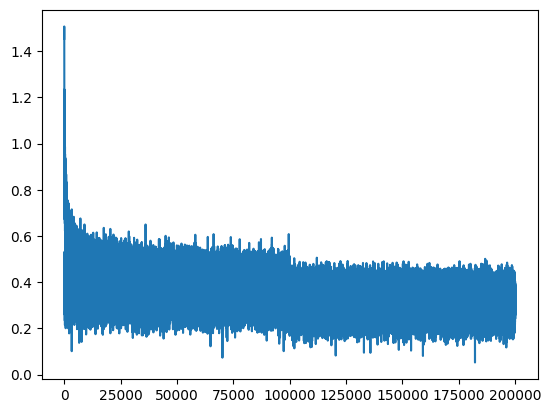

In [16]:
plt.plot(stepi, losses)

In [17]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdim=True)
# loss = -probs[torch.arange(probs.shape[0]), Y].log().mean()
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0728, grad_fn=<NllLossBackward0>)

In [18]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdim=True)
# loss = -probs[torch.arange(probs.shape[0]), Y].log().mean()
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1568, grad_fn=<NllLossBackward0>)

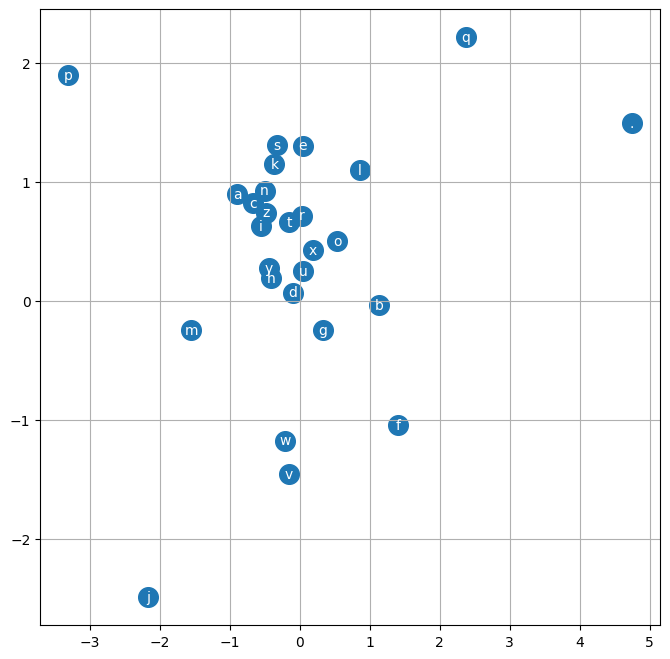

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [28]:
blocksz =3
curr = [stoi['.']] * blocksz
emb = C[curr]
h = torch.tanh(emb.viewz
 100   , )) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
probs = counts / counts.sum()
probs.sum()

SyntaxError: unmatched ')' (4294082006.py, line 5)

In [26]:

g = torch.Generator().manual_seed(2147483647 + 10)
for _ in range(300):
    name = []
    i = 0
    curr = [stoi['.']] * blocksz
    while i < 20:
        emb = C[curr]
        h = torch.tanh(emb.view((30, )) @ W1 + b1)
        logits = h @ W2 + b2
        counts = logits.exp()
        probs = counts / counts.sum()
        pick = torch.multinomial(counts, num_samples=1, replacement=False, generator=g).item()
        if pick == 0: break
        curr = curr[1:] + [pick]
        name += itos[pick]
        i += 1
    
    print(''.join(name), '\n')

carmahela 

jhavi 

kemilia 

aty 

sacassie 

rahnen 

amerynt 

areei 

ner 

keah 

maiir 

kaleigh 

ham 

jorn 

quinthoro 

lea 

jadzi 

wajehoniel 

yoix 

kael 

dura 

mer 

emiia 

gian 

jasri 

alphaniya 

husya 

ambroson 

ajood 

miria 

raenee 

kamden 

odeon 

sakora 

krynn 

amonly 

nora 

kaelano 

briya 

braya 

kemelangen 

marier 

rasis 

qweem 

reyah 

najadar 

kases 

anielambeece 

kyah 

yato 

row 

jayce 

omorin 

carlos 

kres 

auleon 

makyerose 

bryton 

baryiel 

cla 

amrysteon 

nah 

jasxton 

marhviona 

laur 

jisalin 

bella 

zyie 

zarie 

kel 

yasiya 

dagena 

jouri 

avrhivaan 

simbrykeridgt 

samarge 

jalaysabetley 

way 

rel 

dyiah 

dally 

marie 

arshammjraya 

bay 

har 

kalakeima 

nazsen 

gevia 

mon 

abbiarrooklee 

davonna 

keileiya 

kens 

kashity 

faisiaehomartieah 

tra 

everiah 

zenius 

jerestin 

malia 

raiden 

maea 

ashnhel 

gree 

tay 

jaymend 

taydeem 

zophinisharmy 

axyah 

samabreigh 

lee 
